In [13]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv('mcdonalds.csv')
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes,I hate it!-5,47,Once a year,Male
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No,+2,36,Once a week,Female
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No,+3,52,Once a month,Female
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No,+4,41,Every three months,Male


In [15]:
df.head(3)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female


In [16]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [18]:
df.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [19]:

df['Gender'].value_counts()
df['VisitFrequency'].value_counts()
df['Like'].value_counts()

+3              229
+2              187
0               169
+4              160
+1              152
I hate it!-5    152
I love it!+5    143
-3               73
-4               71
-2               59
-1               58
Name: Like, dtype: int64

In [20]:
MD_x = (df.iloc[:, :11] == "Yes").astype(int)
col_means = np.round(MD_x.mean(), 2)
print(col_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


In [21]:
#Considering only first 11 attributes
MD_x = df.iloc[:,:-4]
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,Yes,No,Yes
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,No,Yes,No
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,Yes,No,No
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,No


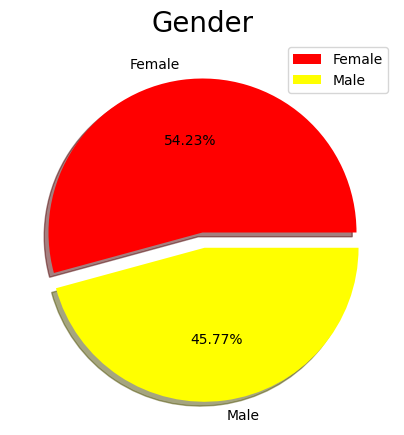

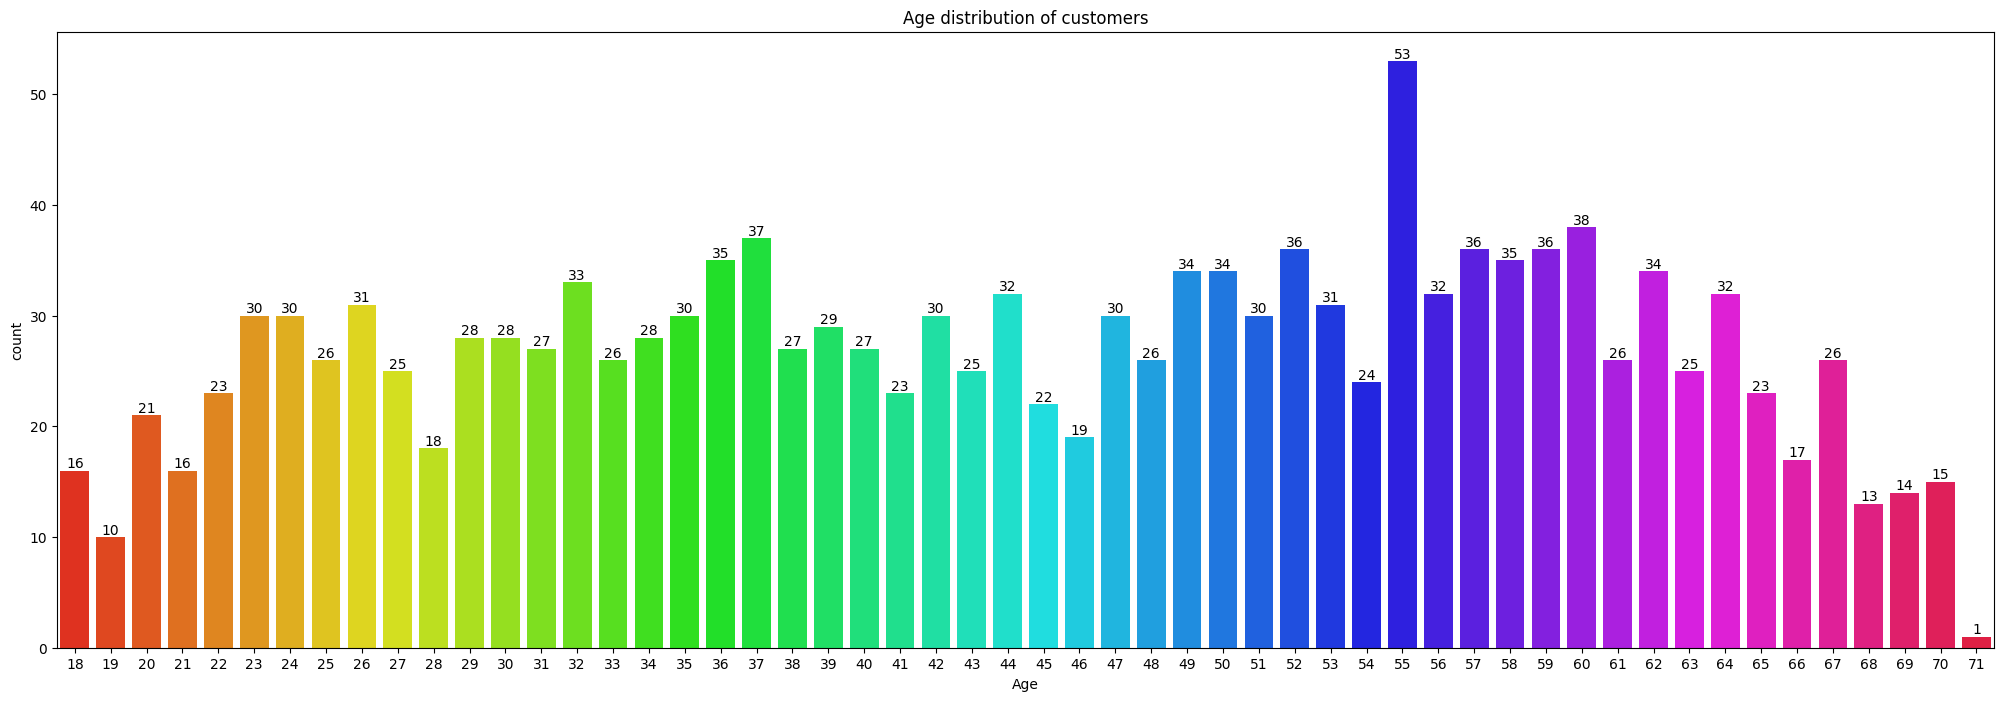

In [22]:
#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['red', 'yellow']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.

#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
f.bar_label(f.containers[0])
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

C:\Users\dell\AppData\Local\Temp\ipykernel_12336\3776887528.py:6: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x="Like", y="Age",data=df,
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


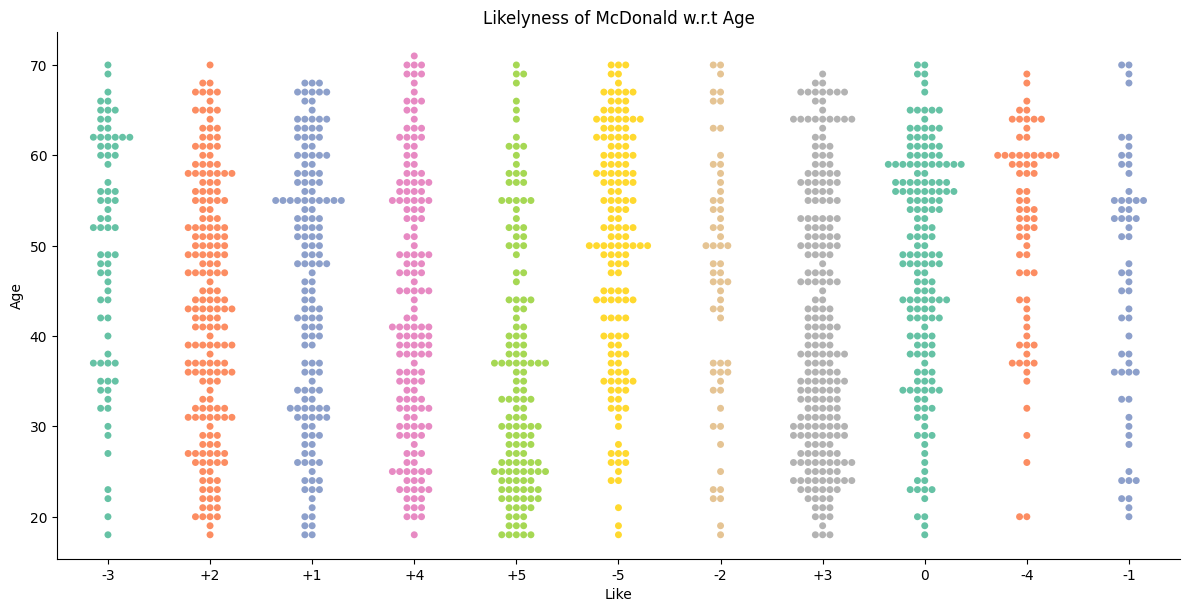

In [23]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.catplot(x="Like", y="Age",data=df, 
            orient="v", height= 6, aspect= 2, palette="Set2",kind="swarm")
plt.title('Likelyness of McDonald w.r.t Age')
plt.show()

In [24]:
#Label encoding for categorical - Converting 11 cols with yes/no

from sklearn.preprocessing import LabelEncoder
def labelling(x):
    df[x] = LabelEncoder().fit_transform(df[x])
    return df

cat = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting']

for i in cat:
    labelling(i)
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,Every three months,Female
1,1,1,0,1,1,1,1,1,1,0,0,+2,51,Every three months,Female
2,0,1,1,1,1,1,0,1,1,1,0,+1,62,Every three months,Female
3,1,1,0,1,1,1,1,1,0,0,1,+4,69,Once a week,Female
4,0,1,0,1,1,1,1,0,0,1,0,+2,49,Once a month,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,-5,47,Once a year,Male
1449,1,1,0,1,0,0,1,1,0,1,0,+2,36,Once a week,Female
1450,1,1,0,1,0,1,0,1,1,0,0,+3,52,Once a month,Female
1451,1,1,0,0,0,1,1,1,0,1,0,+4,41,Every three months,Male


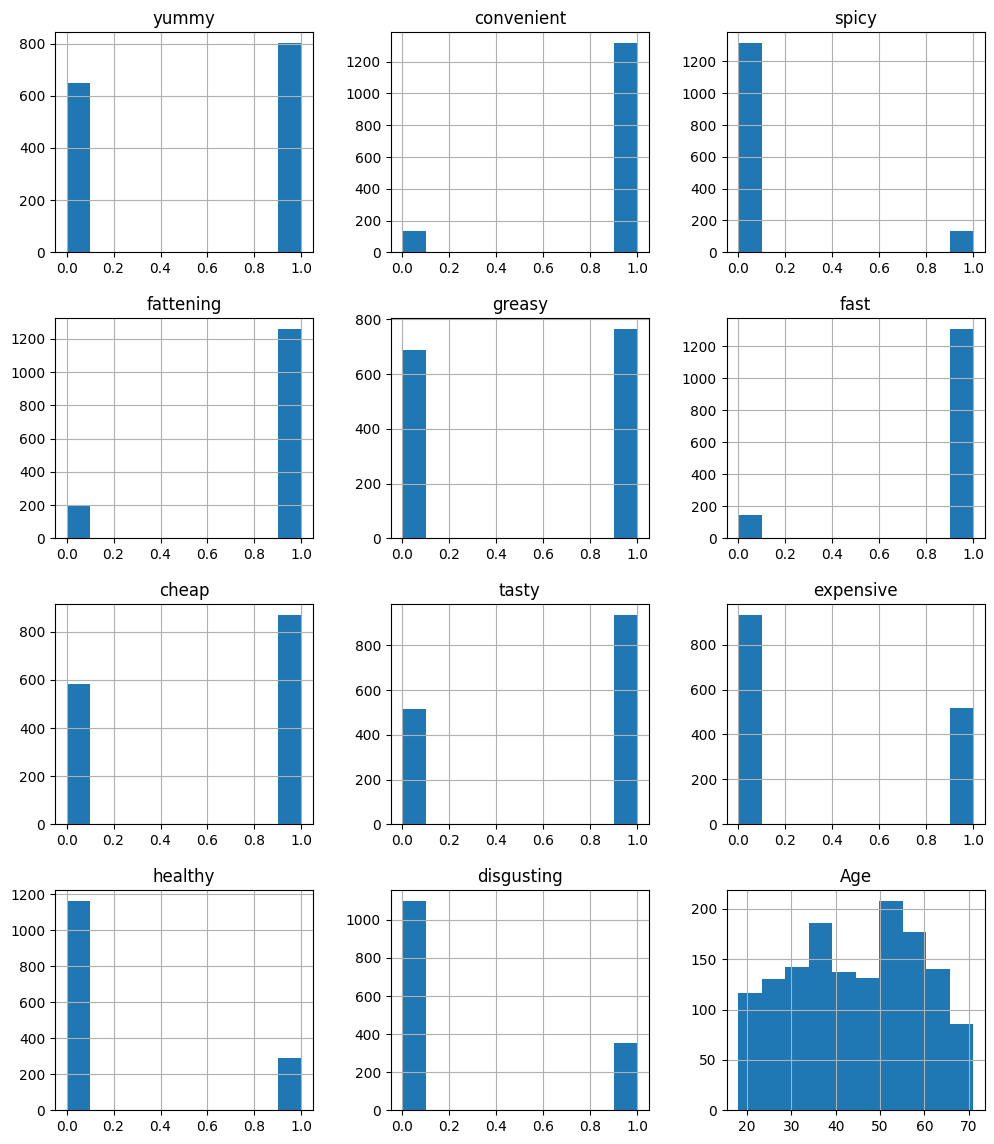

In [25]:
#Histogram of the each attributes
plt.rcParams['figure.figsize'] = (12,14)
df.hist()
plt.show()

In [26]:
#Considering only first 11 attributes
MD_x = df.iloc[:,:-4]
MD_x

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1,0,1,0,0
1,1,1,0,1,1,1,1,1,1,0,0
2,0,1,1,1,1,1,0,1,1,1,0
3,1,1,0,1,1,1,1,1,0,0,1
4,0,1,0,1,1,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1
1449,1,1,0,1,0,0,1,1,0,1,0
1450,1,1,0,1,0,1,0,1,1,0,0
1451,1,1,0,0,0,1,1,1,0,1,0


In [27]:
#Considering only the 11 cols and converting it into array
x = df.iloc[:,:-4].values
x

array([[0, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 0, ..., 1, 0, 0],
       [1, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 1, 0, 1]])

In [28]:
#Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

MD_pca = preprocessing.scale(x)

pca = PCA(n_components=11)
pc = pca.fit_transform(x)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [29]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = MD_x.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute `n_features_` was deprecated in version 1.2 and will be removed in 1.4. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


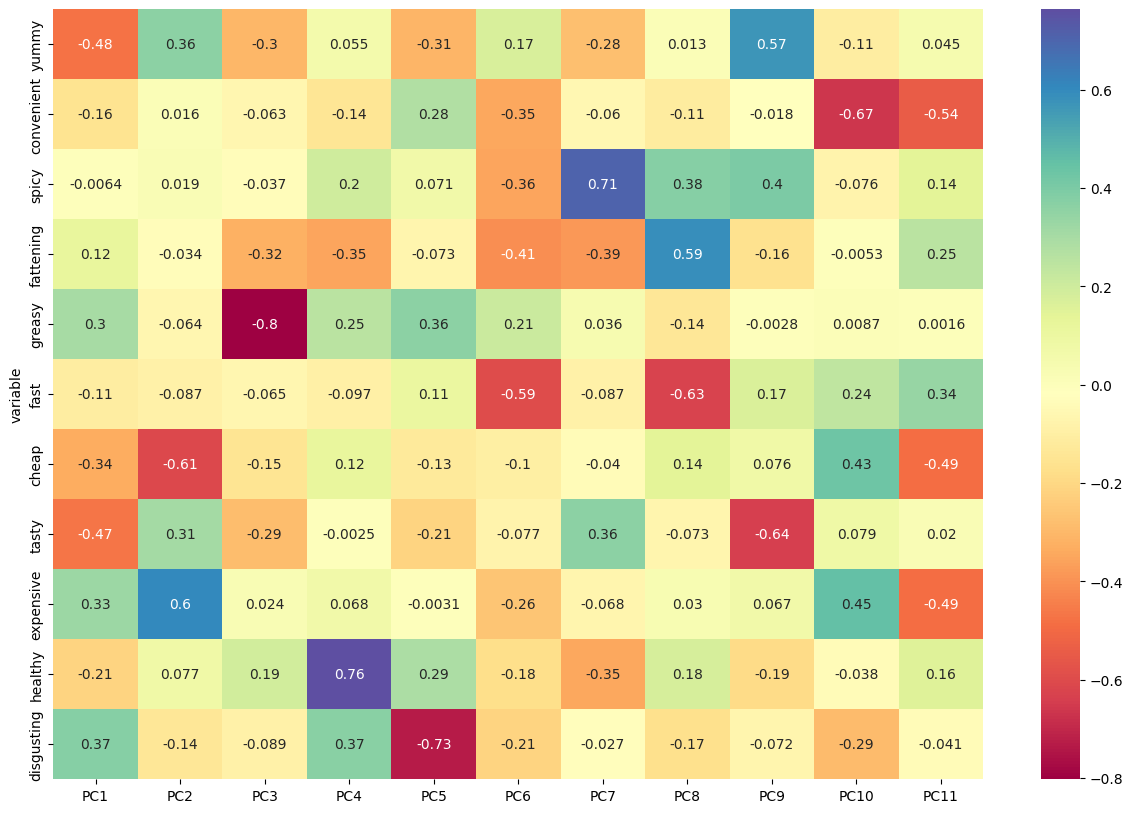

In [30]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (15,10)
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.show()

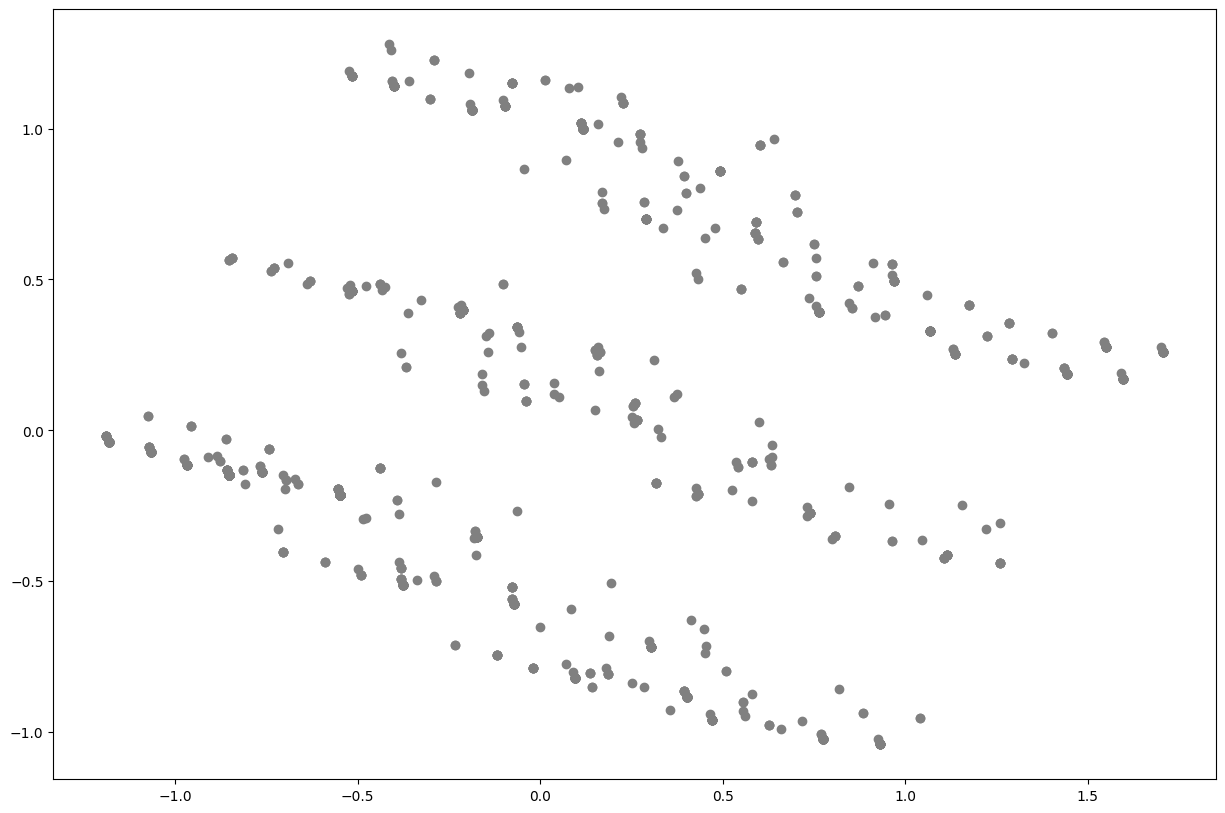

In [31]:
# plot the PCA scores
plt.scatter(pca.fit_transform(MD_x)[:, 0], pca.transform(MD_x)[:, 1], color="grey")

In [32]:
# get PC scores
pca_scores = PCA().fit_transform(x)


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

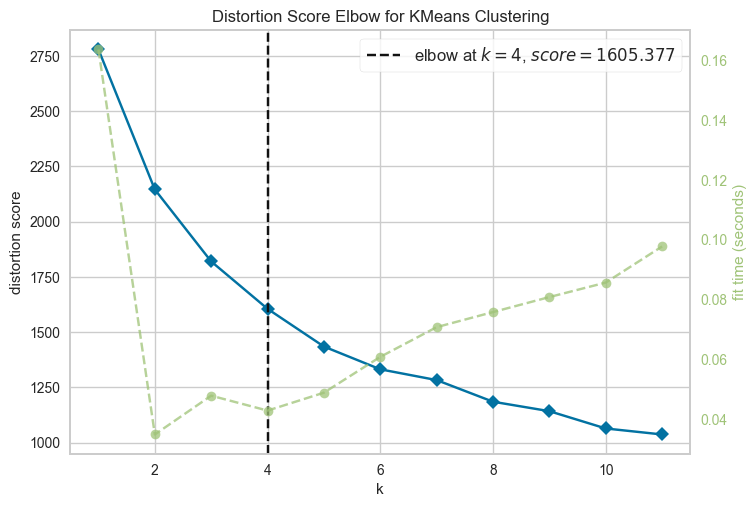

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
#Extracting segments

#Using k-means clustering analysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(MD_x)
visualizer.show()

In [34]:
#K-means clustering 

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD_x)
df['cluster_num'] = kmeans.labels_ #adding to df
print (kmeans.labels_) #Label assigned for each data point
print (kmeans.inertia_) #gives within-cluster sum of squares. 
print(kmeans.n_iter_) #number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) #Location of the centroids on each cluster. 

[2 0 0 ... 0 1 3]
1603.0604440558945
7
[[0.85448916 0.9628483  0.13312693 0.90712074 0.61919505 0.86068111
  0.10835913 0.93188854 0.89783282 0.20433437 0.10526316]
 [0.88793103 0.98103448 0.0862069  0.79482759 0.32931034 0.96034483
  0.92241379 0.97586207 0.01724138 0.32068966 0.04310345]
 [0.02302632 0.89144737 0.07236842 0.92434211 0.66776316 0.96381579
  0.93421053 0.15460526 0.01315789 0.07236842 0.38815789]
 [0.0203252  0.68292683 0.08536585 0.91463415 0.69512195 0.73170732
  0.06504065 0.08943089 0.87804878 0.06097561 0.71544715]]


c:\Users\dell\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [35]:
#To see each cluster size
from collections import Counter
Counter(kmeans.labels_)

Counter({1: 580, 0: 323, 2: 304, 3: 246})

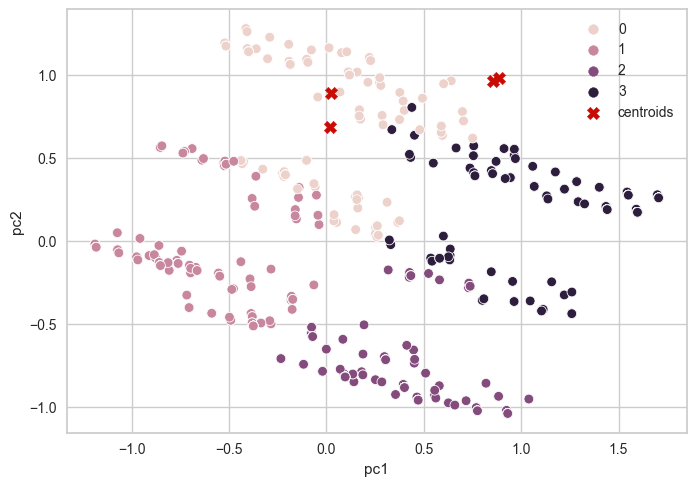

In [36]:
import seaborn as sns
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
import matplotlib.pyplot as plt

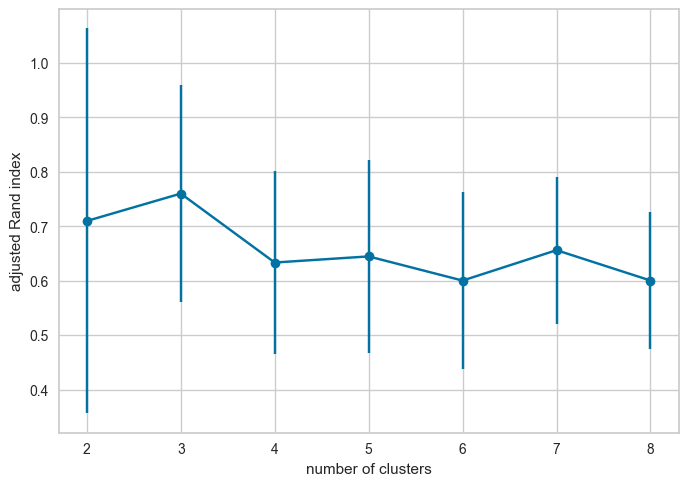

In [38]:
# set the random seed
np.random.seed(1234)

# perform K-means clustering with 2 to 8 clusters and 10 repetitions
n_clusters = range(2, 9)
n_reps = 10
scores = []
for k in n_clusters:
    km = KMeans(n_clusters=k, max_iter=300, n_init=n_reps).fit(MD_x)
    km_labels = km.labels_
    score_k = []
    for i in range(n_reps):
        km_rep = KMeans(n_clusters=k, max_iter=300, n_init=1).fit(MD_x)
        km_rep_labels = km_rep.labels_
        score_k.append(adjusted_rand_score(km_labels, km_rep_labels))
    scores.append(score_k)

# plot the adjusted Rand index scores for each number of clusters
plt.errorbar(n_clusters, np.mean(scores, axis=1), yerr=np.std(scores, axis=1), fmt="o-")
plt.xlabel("number of clusters")
plt.ylabel("adjusted Rand index")
plt.show()

In [39]:
# count the frequency of each value in the "Like" column
like_counts = df["Like"].value_counts()

# reverse the order of the resulting Series
like_counts = like_counts.iloc[::-1]

# print the results
print(like_counts)

-1     58
-2     59
-4     71
-3     73
+5    143
-5    152
+1    152
+4    160
0     169
+2    187
+3    229
Name: Like, dtype: int64


In [40]:
# convert the "Like" column to numeric and subtract from 6 to create a new column
df["Like.n"] = 6 - pd.to_numeric(df["Like"], errors="coerce")

# count the frequency of each value in the "Like.n" column
like_n_counts = df["Like.n"].value_counts()

# print the results
print(like_n_counts)



3     229
4     187
6     169
2     160
5     152
11    152
1     143
9      73
10     71
8      59
7      58
Name: Like.n, dtype: int64


In [41]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage

In [42]:
# compute the pairwise distances between the columns of MD_x
D = np.transpose(MD_x)
D = linkage(D, method = "average")

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [25.0, 25.0, 42.5, 42.5],
  [10.0, 10.0, 33.75, 33.75],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [75.0, 75.0, 92.5, 92.5],
  [65.0, 65.0, 83.75, 83.75],
  [21.875, 21.875, 74.375, 74.375]],
 'dcoord': [[0.0, 15.132745950421556, 15.132745950421556, 0.0],
  [0.0, 13.820274961085254, 13.820274961085254, 0.0],
  [0.0, 16.837294569763987, 16.837294569763987, 13.820274961085254],
  [0.0, 23.67244402390833, 23.67244402390833, 16.837294569763987],
  [15.132745950421556,
   24.097479054882314,
   24.097479054882314,
   23.67244402390833],
  [0.0, 18.303005217723125, 18.303005217723125, 0.0],
  [0.0, 22.260923119338788, 22.260923119338788, 18.303005217723125],
  [0.0, 23.646302388396077, 23.646302388396077, 22.260923119338788],
  [0.0, 26.301594692930717, 26.301594692930717, 23.646302388396077],
  [24.097479054882314,
   30.24915897946193,
   30.24915897946193,
   26.301594692930717

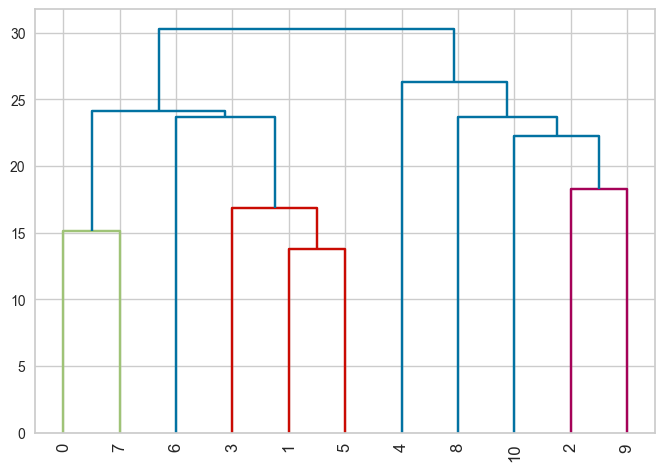

In [43]:
# plot the dendrogram
dendrogram(D, truncate_mode = "lastp", p = 12, leaf_rotation = 90,
           leaf_font_size = 12, show_contracted = True)

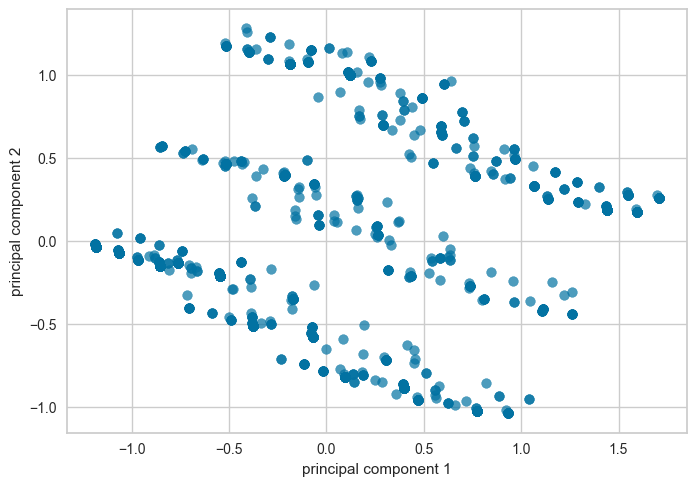

In [44]:
import matplotlib.pyplot as plt

# get the coordinates of the data projected onto the first two principal components
proj_data = pca.fit_transform(x)[:, :2]

# plot the scatter plot
plt.scatter(proj_data[:, 0], proj_data[:, 1], alpha=0.7)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.show()


In [45]:
#DESCRIBING SEGMENTS

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
crosstab 

Like,+1,+2,+3,+4,+5,-1,-2,-3,-4,-5,0
cluster_num,,,,,,,,,,,
0,42,60,66,47,44,7,6,7,3,5,36
1,65,90,143,111,99,13,6,2,4,4,43
2,31,31,12,2,0,25,28,34,36,54,51
3,14,6,8,0,0,13,19,30,28,89,39


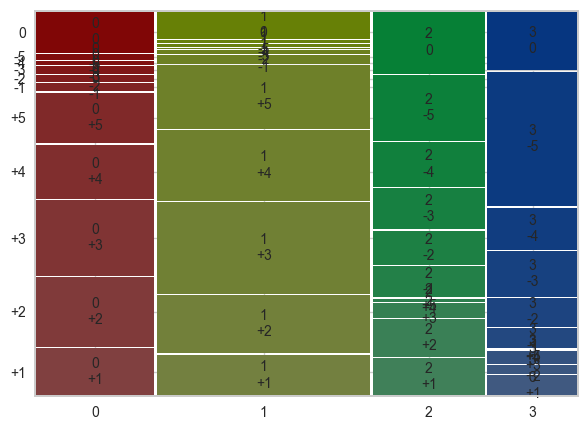

In [46]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

In [47]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,Female,Male
cluster_num,,
0,154,169
1,349,231
2,179,125
3,106,140


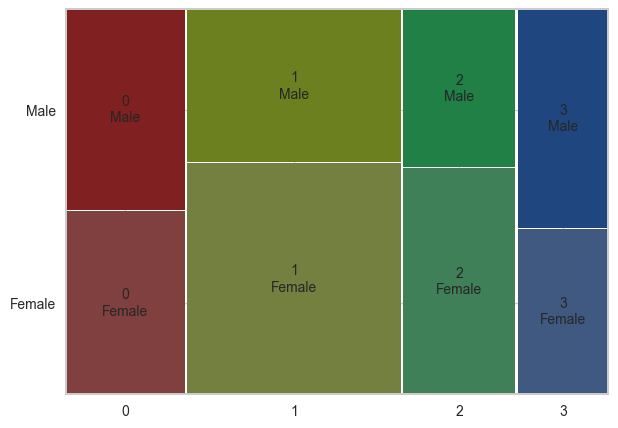

In [48]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

<Axes: xlabel='cluster_num', ylabel='Age'>

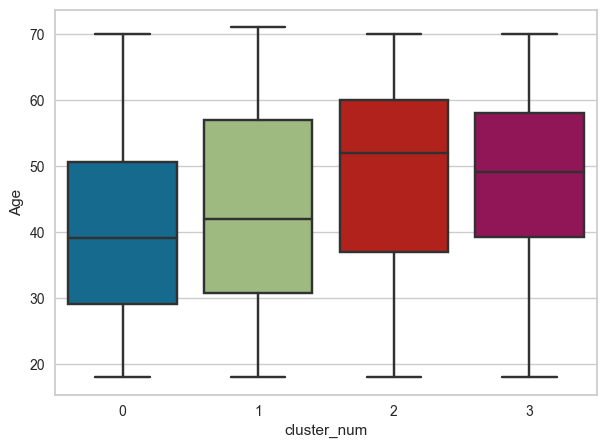

In [49]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)

In [50]:
#Calculating the mean
#Visit frequency
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
visit = df.groupby('cluster_num')['VisitFrequency'].mean()
visit = visit.to_frame().reset_index()
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [51]:
#Like
df['Like'] = LabelEncoder().fit_transform(df['Like'])
Like = df.groupby('cluster_num')['Like'].mean()
Like = Like.to_frame().reset_index()
Like

,cluster_num,Like
0,0,3.275542
1,1,2.962069
2,2,6.171053
3,3,7.422764


In [52]:
#Gender
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])
Gender = df.groupby('cluster_num')['Gender'].mean()
Gender = Gender.to_frame().reset_index()
Gender

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


In [53]:
segment = Gender.merge(Like, on='cluster_num', how='left').merge(visit, on='cluster_num', how='left')
segment

,cluster_num,Gender,Like,VisitFrequency
0,0,0.523220,3.275542,2.547988
1,1,0.398276,2.962069,2.584483
2,2,0.411184,6.171053,2.822368
3,3,0.569106,7.422764,2.654472


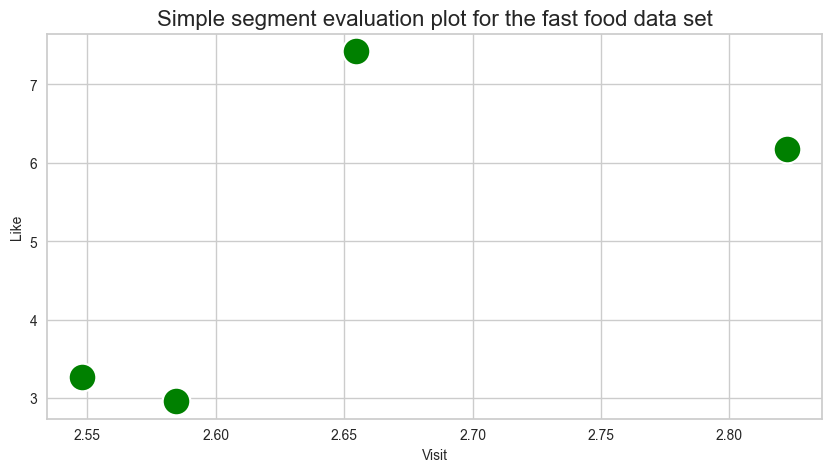

In [54]:
#Target segments

plt.figure(figsize = (10,5))
sns.scatterplot(x = "VisitFrequency", y = "Like",data=segment,s=400, color="green")
plt.title("Simple segment evaluation plot for the fast food data set",
          fontsize = 16) 
plt.xlabel("Visit", fontsize = 10) 
plt.ylabel("Like", fontsize = 10) 
plt.show()